# <div style="margin-left :210px">Breast Cancer Survival Project </div>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has breast cancer based on their <b>medical attributes</b>.
## Haberman's Survival Data
The dataset is available from here (haberman.csv) :
    https://github.com/jbrownlee/Datasets/blob/master/haberman.csv

### Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.
### <div style="display: flex"><div> Number of Instances : </div><div style="color:blue ;float:left;margin-left:10px" > 306</div></div>
### <div style="display: flex"><div> Number of Attributes : </div><div style="color:blue ;float:left;margin-left:10px" > 4</div></div>
### Attribute Information:
   1. Age of patient at time of operation (numerical)<br>
   2. Patient's year of operation (year - 1900, numerical)<br>
   3. Number of positive axillary nodes detected (numerical)<br>
   4. Survival status (class attribute)<br>
         1 = the patient survived 5 years or longer<br>
         2 = the patient died within 5 year<br>
### <div style="display: flex"><div><p>  Missing Attribute Values : </p></div><div style="color:blue ;float:left;margin-left:10px" ><p> None  </p></div></div>

### Preparing the Tools

In [27]:
from pandas import read_csv
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#if tensorflow not installed
 #!pip install tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from matplotlib import pyplot


In [28]:
# load data from the url
url ="https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv"
data =read_csv(url,header=None)
print(data.shape)

(306, 4)


In [29]:
data

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


### Summary Statistics

                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
[[<Axes: title={'center': '0'}> <Axes: title={'center': '1'}>]
 [<Axes: title={'center': '2'}> <Axes: title={'center': '3'}>]]


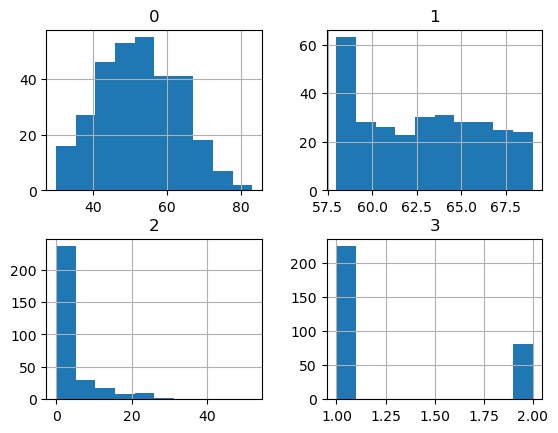

In [30]:
print(data.describe())
print (data.hist())

In [31]:
columns =['age','year','nodes','class']

#load the data with names for the columns
data_names = read_csv(url,header=None,names=columns)

#calculate the targets
targets =data_names['class'].values

counter = Counter (targets);
counter.items()
for key,value in counter.items():
    percentage = value /len(targets) * 100
    print('Class = %d , Count= %d , Percentage = %.3f %%' % (key,value,percentage))

Class = 1 , Count= 225 , Percentage = 73.529 %
Class = 2 , Count= 81 , Percentage = 26.471 %


In [12]:
#preparing the input(X) & the output(Y)
X,Y = data_names.values[:,:-1],data_names.values[:,-1]

#preprocessing 
X = X.astype('float32')
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

#splitting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,stratify=Y,random_state=3)

### Building & Preparing the Deep learning Model

In [19]:
# number of features
n_features = X.shape[1]

# Build the model
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(n_features,)))
model.add(Dense(1,activation='sigmoid'))

# set the Configuration
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Train the ML model

In [20]:
history = model.fit(X_train,Y_train,epochs=200,batch_size=20,validation_data=(X_test,Y_test))

Epoch 1/200
8/8 [==============================] - 2s 49ms/step - loss: 42.3576 - accuracy: 0.2614 - val_loss: 40.0631 - val_accuracy: 0.2680
Epoch 2/200
8/8 [==============================] - 0s 13ms/step - loss: 39.1198 - accuracy: 0.2614 - val_loss: 36.8834 - val_accuracy: 0.2680
Epoch 3/200
8/8 [==============================] - 0s 14ms/step - loss: 35.9822 - accuracy: 0.2614 - val_loss: 33.8489 - val_accuracy: 0.2680
Epoch 4/200
8/8 [==============================] - 0s 19ms/step - loss: 32.9441 - accuracy: 0.2614 - val_loss: 30.9267 - val_accuracy: 0.2680
Epoch 5/200
8/8 [==============================] - 0s 19ms/step - loss: 30.0883 - accuracy: 0.2614 - val_loss: 28.1281 - val_accuracy: 0.2680
Epoch 6/200
8/8 [==============================] - 0s 16ms/step - loss: 27.3408 - accuracy: 0.2614 - val_loss: 25.4679 - val_accuracy: 0.2680
Epoch 7/200
8/8 [==============================] - 0s 20ms/step - loss: 24.6864 - accuracy: 0.2614 - val_loss: 22.9124 - val_accuracy: 0.2680
Epoch 

Epoch 59/200
8/8 [==============================] - 0s 24ms/step - loss: 0.5985 - accuracy: 0.7647 - val_loss: 0.5767 - val_accuracy: 0.7451
Epoch 60/200
8/8 [==============================] - 0s 20ms/step - loss: 0.5987 - accuracy: 0.7647 - val_loss: 0.5763 - val_accuracy: 0.7451
Epoch 61/200
8/8 [==============================] - 0s 34ms/step - loss: 0.5975 - accuracy: 0.7582 - val_loss: 0.5747 - val_accuracy: 0.7451
Epoch 62/200
8/8 [==============================] - 0s 20ms/step - loss: 0.5958 - accuracy: 0.7516 - val_loss: 0.5744 - val_accuracy: 0.7451
Epoch 63/200
8/8 [==============================] - 0s 19ms/step - loss: 0.5945 - accuracy: 0.7647 - val_loss: 0.5751 - val_accuracy: 0.7451
Epoch 64/200
8/8 [==============================] - 0s 33ms/step - loss: 0.5937 - accuracy: 0.7647 - val_loss: 0.5745 - val_accuracy: 0.7451
Epoch 65/200
8/8 [==============================] - 0s 24ms/step - loss: 0.5929 - accuracy: 0.7647 - val_loss: 0.5735 - val_accuracy: 0.7451
Epoch 66/200


Epoch 117/200
8/8 [==============================] - 0s 32ms/step - loss: 0.5667 - accuracy: 0.7647 - val_loss: 0.5585 - val_accuracy: 0.7516
Epoch 118/200
8/8 [==============================] - 0s 29ms/step - loss: 0.5676 - accuracy: 0.7647 - val_loss: 0.5612 - val_accuracy: 0.7451
Epoch 119/200
8/8 [==============================] - 0s 20ms/step - loss: 0.5650 - accuracy: 0.7647 - val_loss: 0.5585 - val_accuracy: 0.7516
Epoch 120/200
8/8 [==============================] - 0s 21ms/step - loss: 0.5679 - accuracy: 0.7516 - val_loss: 0.5583 - val_accuracy: 0.7516
Epoch 121/200
8/8 [==============================] - 0s 22ms/step - loss: 0.5660 - accuracy: 0.7647 - val_loss: 0.5593 - val_accuracy: 0.7451
Epoch 122/200
8/8 [==============================] - 0s 23ms/step - loss: 0.5687 - accuracy: 0.7516 - val_loss: 0.5604 - val_accuracy: 0.7451
Epoch 123/200
8/8 [==============================] - 0s 22ms/step - loss: 0.5628 - accuracy: 0.7582 - val_loss: 0.5574 - val_accuracy: 0.7582
Epoch 

Epoch 175/200
8/8 [==============================] - 0s 31ms/step - loss: 0.5572 - accuracy: 0.7516 - val_loss: 0.5489 - val_accuracy: 0.7516
Epoch 176/200
8/8 [==============================] - 0s 26ms/step - loss: 0.5546 - accuracy: 0.7516 - val_loss: 0.5507 - val_accuracy: 0.7386
Epoch 177/200
8/8 [==============================] - 0s 30ms/step - loss: 0.5551 - accuracy: 0.7516 - val_loss: 0.5500 - val_accuracy: 0.7451
Epoch 178/200
8/8 [==============================] - 0s 37ms/step - loss: 0.5554 - accuracy: 0.7516 - val_loss: 0.5491 - val_accuracy: 0.7516
Epoch 179/200
8/8 [==============================] - 0s 24ms/step - loss: 0.5598 - accuracy: 0.7386 - val_loss: 0.5494 - val_accuracy: 0.7516
Epoch 180/200
8/8 [==============================] - 0s 31ms/step - loss: 0.5543 - accuracy: 0.7516 - val_loss: 0.5493 - val_accuracy: 0.7516
Epoch 181/200
8/8 [==============================] - 0s 30ms/step - loss: 0.5536 - accuracy: 0.7516 - val_loss: 0.5482 - val_accuracy: 0.7516
Epoch 

In [24]:
#from sklearn.metrics import accuracy_score

# predict
Y_predict = (model.predict(X_test) > 0.5 ).astype(int)
score = accuracy_score(Y_test,Y_predict)
print ('Accuracy: %.3f %% ' % score)

5/5 [==============================] - 0s 4ms/step
Accuracy: 0.752 % 


### Learning Curves : Loss

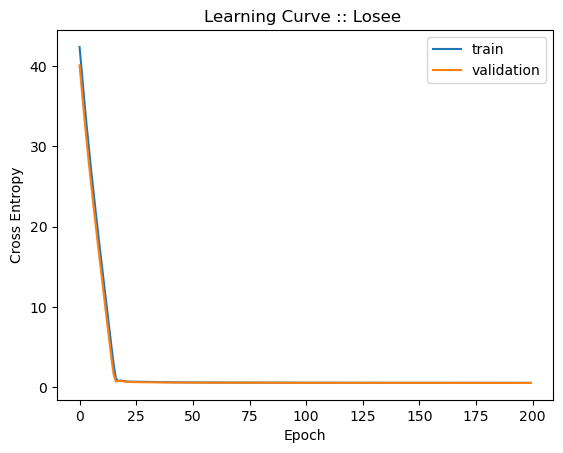

In [25]:
pyplot.title('Learning Curve :: Losee ')
pyplot.xlabel("Epoch")
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='validation')
pyplot.legend()
pyplot.show()

### Learning Curves : Accuracy

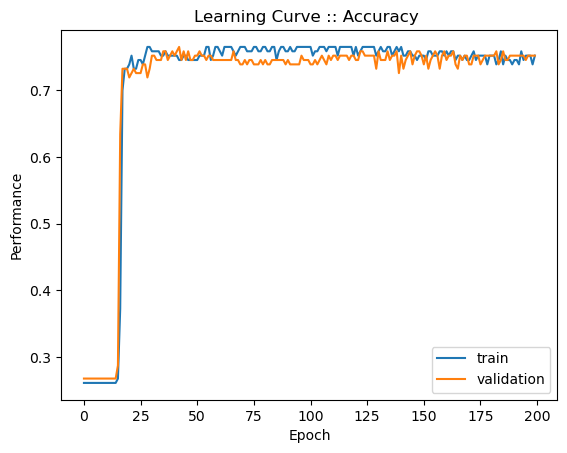

In [26]:
pyplot.title('Learning Curve :: Accuracy ')
pyplot.xlabel("Epoch")
pyplot.ylabel('Performance')
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='validation')
pyplot.legend()
pyplot.show()